# Microchannel heat sink optimization using regression models



Firstly, nearly 200 data were generated with COMSOL Multiphysics. this problem, we have five major features($N$,$H_R$,$V_R$,$L_R$,$W_R$) and one target ($R_{Th}$).

In [116]:
# Import lib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
plt.rcParams["font.family"] = "Times New Roman"
from PIL import Image
from io import BytesIO

In [117]:
# Reading data
data = pd.read_csv ("E:\machine learning/test-c.csv")
data

,N,Rh,Rv,Rl,Rw,Rth
0,0.62,0.222222,0.6,0.5,0.3472,0.176797
1,0.62,0.222222,0.6,0.7,0.3472,0.146426
2,0.62,0.222222,0.6,0.9,0.3472,0.139309
3,0.62,0.222222,0.7,0.5,0.3472,0.179029
4,0.62,0.222222,0.7,0.7,0.3472,0.149079
...,...,...,...,...,...,...
188,0.72,0.500000,0.7,0.5,0.4032,0.140300
189,0.72,0.500000,0.7,0.7,0.4032,0.142883
190,0.72,0.500000,0.7,0.9,0.4032,0.143724
191,0.72,0.500000,0.8,0.5,0.4032,0.140070


In [118]:
# Generating dataframe
df = pd.DataFrame (data,columns=['N','Rh','Rv','Rl','Rw','Rth'])
df

,N,Rh,Rv,Rl,Rw,Rth
0,0.62,0.222222,0.6,0.5,0.3472,0.176797
1,0.62,0.222222,0.6,0.7,0.3472,0.146426
2,0.62,0.222222,0.6,0.9,0.3472,0.139309
3,0.62,0.222222,0.7,0.5,0.3472,0.179029
4,0.62,0.222222,0.7,0.7,0.3472,0.149079
...,...,...,...,...,...,...
188,0.72,0.500000,0.7,0.5,0.4032,0.140300
189,0.72,0.500000,0.7,0.7,0.4032,0.142883
190,0.72,0.500000,0.7,0.9,0.4032,0.143724
191,0.72,0.500000,0.8,0.5,0.4032,0.140070


In [119]:
df.describe()

,N,Rh,Rv,Rl,Rw,Rth
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.711710,0.295394,0.730674,0.763834,0.398558,0.142416
std,0.054798,0.111633,0.083946,0.154380,0.030687,0.009278
min,0.620000,0.166667,0.600000,0.500000,0.347200,0.134785
25%,0.680000,0.222222,0.700000,0.700000,0.380800,0.136036
50%,0.710000,0.222222,0.780000,0.840000,0.397600,0.139309
75%,0.720000,0.333333,0.800000,0.900000,0.403200,0.144725
max,0.820000,0.500000,0.900000,0.920000,0.459200,0.181471


In [120]:
x = pd.DataFrame (df, columns=['N','Rh','Rv','Rl','Rw'])
y = df['Rth'].values.reshape(-1,1)

In [121]:
# 80% for training and 20% for the test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [122]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [123]:
y_pred = regressor.predict(x_test)

In [124]:
# Evaluation of the model based on error criteria
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean squared Error : ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean squared Error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 score : ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error :  0.003188358883695802
Mean squared Error :  2.0100506348743856e-05
Root Mean squared Error :  0.004483358824446673
R2 score :  0.6439757718648884


Trying polynomial regression model by adding the square of the parameters as new features and adding them to the dataset.

In [125]:
N2 = df.N**2
Rh2 = df.Rh**2
Rv2 = df.Rv**2
Rl2 = df.Rl**4
Rw2 = df.Rw**2

In [126]:
df.insert(5, "N2", N2)
df.insert(6, "Rh2", Rh2)
df.insert(7, "Rv2", Rv2)
df.insert(8, "Rl2", Rl2)
df.insert(9, "Rw2", Rw2)
df

,N,Rh,Rv,Rl,Rw,N2,Rh2,Rv2,Rl2,Rw2,Rth
0,0.62,0.222222,0.6,0.5,0.3472,0.3844,0.049383,0.36,0.0625,0.120548,0.176797
1,0.62,0.222222,0.6,0.7,0.3472,0.3844,0.049383,0.36,0.2401,0.120548,0.146426
2,0.62,0.222222,0.6,0.9,0.3472,0.3844,0.049383,0.36,0.6561,0.120548,0.139309
3,0.62,0.222222,0.7,0.5,0.3472,0.3844,0.049383,0.49,0.0625,0.120548,0.179029
4,0.62,0.222222,0.7,0.7,0.3472,0.3844,0.049383,0.49,0.2401,0.120548,0.149079
...,...,...,...,...,...,...,...,...,...,...,...
188,0.72,0.500000,0.7,0.5,0.4032,0.5184,0.250000,0.49,0.0625,0.162570,0.140300
189,0.72,0.500000,0.7,0.7,0.4032,0.5184,0.250000,0.49,0.2401,0.162570,0.142883
190,0.72,0.500000,0.7,0.9,0.4032,0.5184,0.250000,0.49,0.6561,0.162570,0.143724
191,0.72,0.500000,0.8,0.5,0.4032,0.5184,0.250000,0.64,0.0625,0.162570,0.140070


In [127]:
x = pd.DataFrame (df, columns=['N','N2','Rh','Rh2','Rv','Rv2','Rl','Rl2','Rw','Rw2'])
y = df['Rth'].values.reshape(-1,1)

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [129]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [130]:
y_pred = regressor.predict(x_test)

In [131]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean squared Error : ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean squared Error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 score : ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error :  0.0013032131109171376
Mean squared Error :  2.716240099947646e-06
Root Mean squared Error :  0.0016481019689168646
R2 score :  0.9518894067524855


Now we have an accurate model!

It is the time to visualize the predicted and actual data of the testing proportion.

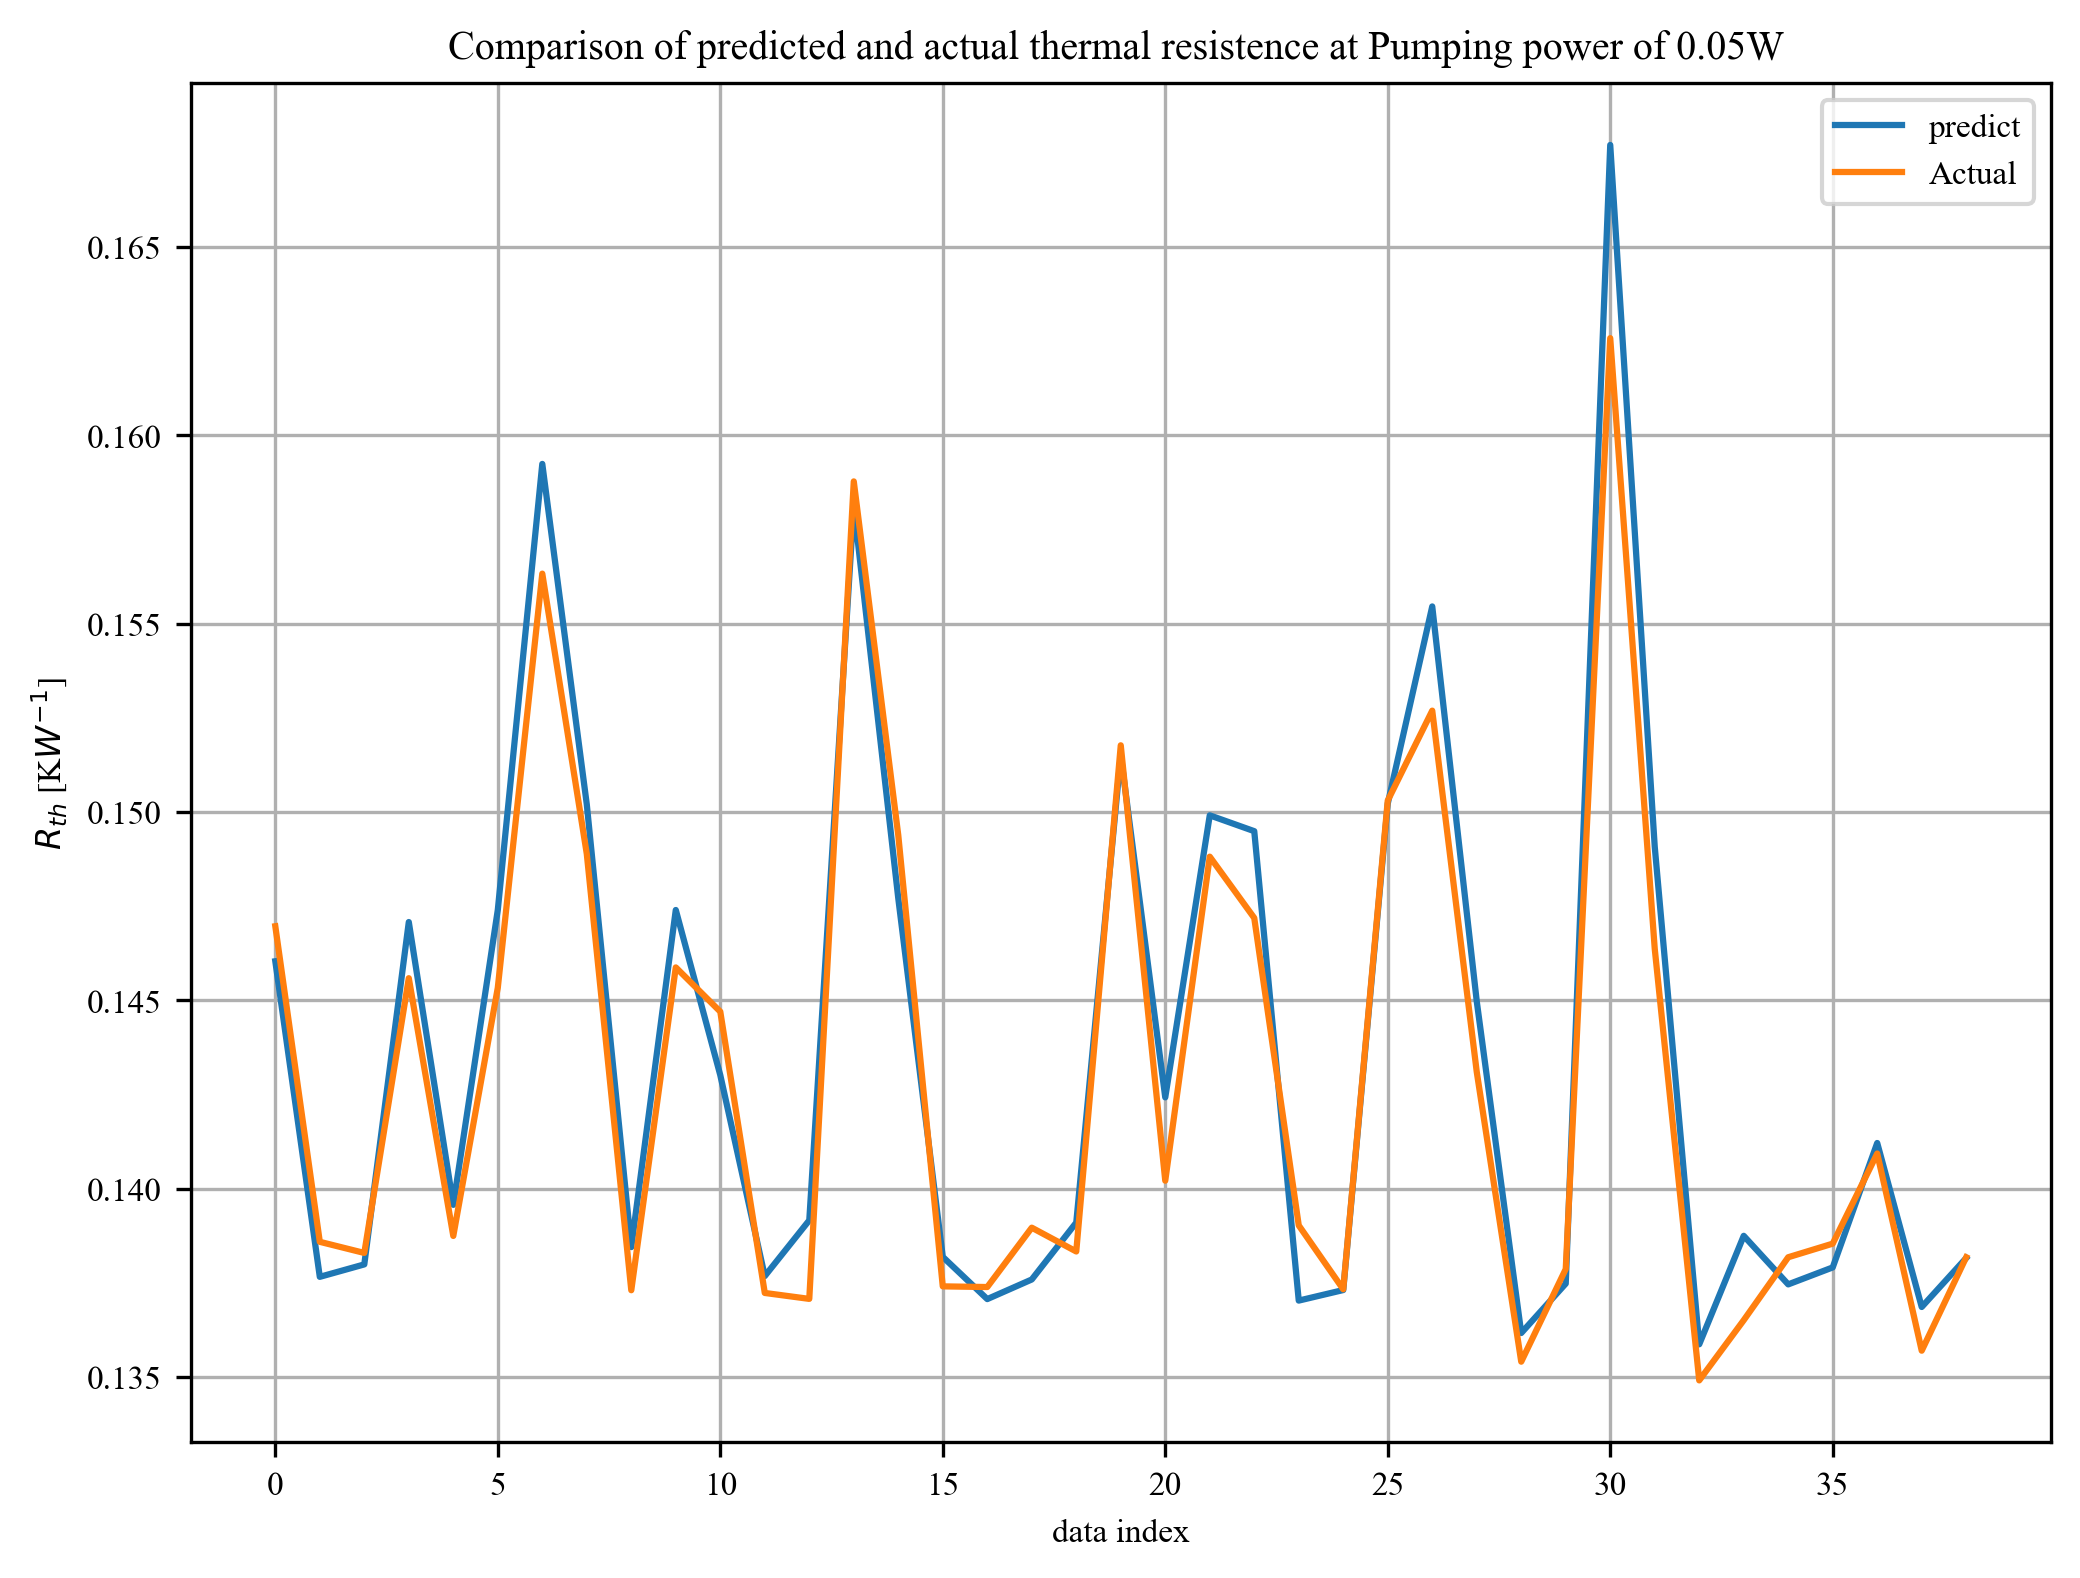

In [132]:
Compare = pd.DataFrame ({'Actual':y_test.flatten(),'predict':y_pred.flatten()})
plt.figure(figsize = (8,6), dpi = 300)
plt.plot(Compare,label={'Actual',"predict"})
plt.xlabel ("data index")
plt.ylabel ("$R_{th}$ [K$W^{-1}$]")
plt.title ("Comparison of predicted and actual thermal resistence at Pumping power of 0.05W ")
plt.legend(loc='best')
plt.grid()
plt.show()

In [133]:
T=np.array(y_test.flatten())

In [134]:
P=np.array(y_pred.flatten())

In [135]:
# Import libs.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
plt.rcParams["font.family"] = "Times New Roman"
from PIL import Image
from io import BytesIO

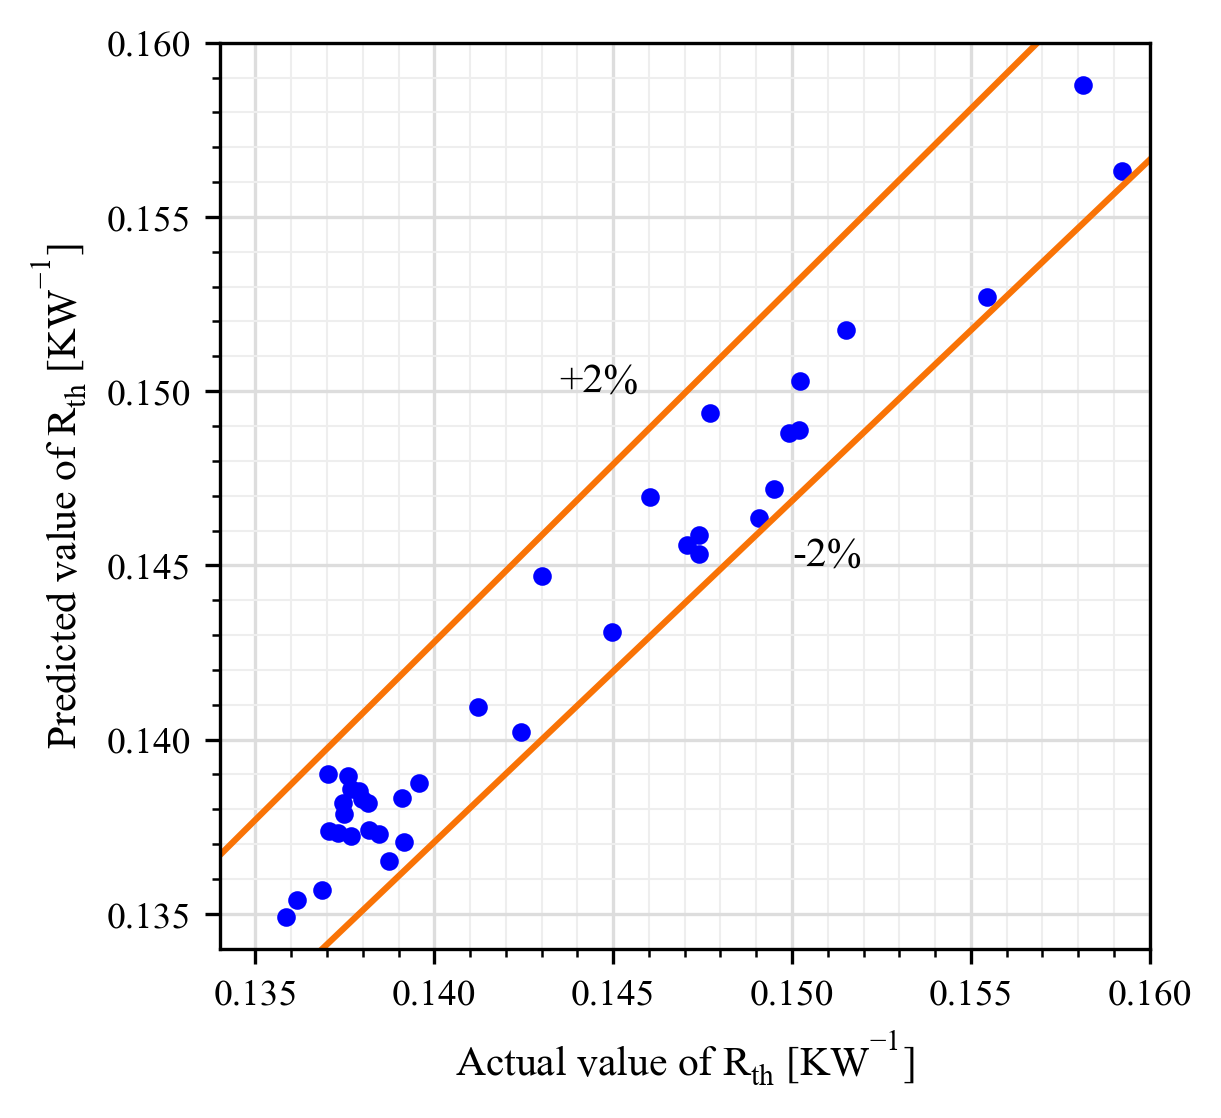

In [136]:
fig, ax = plt.subplots(figsize=[4, 4], dpi = 300)
ax.annotate('-2%', xy = (0.15, 0.145),fontsize=10)
ax.annotate('+2%', xy = (0.1435, 0.15),fontsize=10)


plt.scatter(T,P,s=12,color = 'b')


x1 = [0,1,2,3]
y1 = [0,1.02,2.04,3.06]
plt.plot(x1, y1,color = '#F97306')
x2 = [0,1,2,3]
y2 = [0,0.979,1.958,2.937]
plt.plot(x2, y2,color = '#F97306')

plt.xlabel ("Actual value of $\mathdefault{R_{th}}$ [$\mathdefault{KW^{-1}}$]",fontsize=10)
plt.ylabel ("Predicted value of $\mathdefault{R_{th}}$ [$\mathdefault{KW^{-1}}$]",fontsize=10)
plt.rcParams.update({'font.size': 8})
handles, labels = plt.gca().get_legend_handles_labels()
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.xlim(0.134,0.16)
plt.ylim(0.134,0.16)

plt.grid(b=True, which='major', color='#DDDDDD', linestyle='-', linewidth=0.8)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#EEEEEE', linestyle='-', linewidth=0.5)
plt.rc('axes', axisbelow=True)
plt.show()


In [137]:
# Finding the coefficients of the polynomial model
print(regressor.intercept_)
print(regressor.coef_)

[0.64857668]
[[-0.90923445  0.76458764 -0.05384331  0.05825483 -0.03672348  0.02117113
  -0.10114099  0.04460771 -0.50917129  0.23977468]]


Checking the five external data prediction, while the total original dataset is used for training

In [138]:
# Reading data
data2 = pd.read_csv ("E:\machine learning/test-cf.csv")
data2

,N,Rh,Rv,Rl,Rw
0,0.70,0.18889,0.78,0.84,0.392
1,0.71,0.18889,0.78,0.70,0.340
2,0.72,0.18889,0.78,0.90,0.430
3,0.69,0.18889,0.78,0.80,0.392
4,0.68,0.18889,0.78,0.70,0.392


In [139]:
df2 = pd.DataFrame (data2,columns=['N','Rh','Rv','Rl','Rw'])
df2

,N,Rh,Rv,Rl,Rw
0,0.70,0.18889,0.78,0.84,0.392
1,0.71,0.18889,0.78,0.70,0.340
2,0.72,0.18889,0.78,0.90,0.430
3,0.69,0.18889,0.78,0.80,0.392
4,0.68,0.18889,0.78,0.70,0.392


In [140]:
N2 = df2.N**2
Rh2 = df2.Rh**2
Rv2 = df2.Rv**2
Rl2 = df2.Rl**4
Rw2 = df2.Rw**2

In [141]:
df2.insert(5, "N2", N2)
df2.insert(6, "Rh2", Rh2)
df2.insert(7, "Rv2", Rv2)
df2.insert(8, "Rl2", Rl2)
df2.insert(9, "Rw2", Rw2)
df2

,N,Rh,Rv,Rl,Rw,N2,Rh2,Rv2,Rl2,Rw2
0,0.70,0.18889,0.78,0.84,0.392,0.4900,0.035679,0.6084,0.497871,0.153664
1,0.71,0.18889,0.78,0.70,0.340,0.5041,0.035679,0.6084,0.240100,0.115600
2,0.72,0.18889,0.78,0.90,0.430,0.5184,0.035679,0.6084,0.656100,0.184900
3,0.69,0.18889,0.78,0.80,0.392,0.4761,0.035679,0.6084,0.409600,0.153664
4,0.68,0.18889,0.78,0.70,0.392,0.4624,0.035679,0.6084,0.240100,0.153664


In [142]:
# Adding the additional data for prediction to the dataset
df3 = df.append(df2)
df3

,N,Rh,Rv,Rl,Rw,N2,Rh2,Rv2,Rl2,Rw2,Rth
0,0.62,0.222222,0.60,0.50,0.3472,0.3844,0.049383,0.3600,0.062500,0.120548,0.176797
1,0.62,0.222222,0.60,0.70,0.3472,0.3844,0.049383,0.3600,0.240100,0.120548,0.146426
2,0.62,0.222222,0.60,0.90,0.3472,0.3844,0.049383,0.3600,0.656100,0.120548,0.139309
3,0.62,0.222222,0.70,0.50,0.3472,0.3844,0.049383,0.4900,0.062500,0.120548,0.179029
4,0.62,0.222222,0.70,0.70,0.3472,0.3844,0.049383,0.4900,0.240100,0.120548,0.149079
...,...,...,...,...,...,...,...,...,...,...,...
0,0.70,0.188890,0.78,0.84,0.3920,0.4900,0.035679,0.6084,0.497871,0.153664,NaN
1,0.71,0.188890,0.78,0.70,0.3400,0.5041,0.035679,0.6084,0.240100,0.115600,NaN
2,0.72,0.188890,0.78,0.90,0.4300,0.5184,0.035679,0.6084,0.656100,0.184900,NaN
3,0.69,0.188890,0.78,0.80,0.3920,0.4761,0.035679,0.6084,0.409600,0.153664,NaN


In [143]:
train = df3.iloc[:193]
test = df3.iloc[193:]

In [144]:
test

,N,Rh,Rv,Rl,Rw,N2,Rh2,Rv2,Rl2,Rw2,Rth
0,0.70,0.18889,0.78,0.84,0.392,0.4900,0.035679,0.6084,0.497871,0.153664,NaN
1,0.71,0.18889,0.78,0.70,0.340,0.5041,0.035679,0.6084,0.240100,0.115600,NaN
2,0.72,0.18889,0.78,0.90,0.430,0.5184,0.035679,0.6084,0.656100,0.184900,NaN
3,0.69,0.18889,0.78,0.80,0.392,0.4761,0.035679,0.6084,0.409600,0.153664,NaN
4,0.68,0.18889,0.78,0.70,0.392,0.4624,0.035679,0.6084,0.240100,0.153664,NaN


In [152]:
# Training with 100% of the original dataset, and allocate the five added data for testing and prediction
x_train = df3[['N','N2','Rh','Rh2','Rv','Rv2','Rl','Rl2','Rw','Rw2']][:193]
y_train = df3["Rth"][:193].values.reshape(-1,1)

In [153]:
x_test = df3[['N','N2','Rh','Rh2','Rv','Rv2','Rl','Rl2','Rw','Rw2']][193:]

In [154]:
regressor.fit(x_train, y_train)

LinearRegression()

In [155]:
# Prediction of the model for these five cases
y_pred = regressor.predict(x_test)
print(y_pred)

[[0.13745242]
 [0.15978823]
 [0.12978007]
 [0.13603237]
 [0.13723304]]
